In [91]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

### Importing the data

In [92]:
file_path = 'D:/Academics/Data Science/AnalytixLabs/Python/Case Studies/Python Foundation Case Study 2 - Credit Card Case Study/'

cust_acq = pd.read_excel(file_path+'Credit Card Data.xlsx' , sheet_name = 'Customer Acqusition' , index_col='No')
spend = pd.read_excel(file_path+'Credit Card Data.xlsx' , sheet_name = 'Spend', index_col='Sl No:' )
repay = pd.read_excel(file_path+'Credit Card Data.xlsx' , sheet_name = 'Repayment' , index_col='SL No:')

### Exploratory Data Analysis
#### Understanding the data and data types

In [93]:
cust_acq.head()

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001,C4,Govt
5,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [94]:
cust_acq.Product = np.where(cust_acq.Product == 'Platimum', 'Platinum', cust_acq.Product)

In [95]:
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  100 non-null    object
 1   Age       100 non-null    int64 
 2   City      100 non-null    object
 3   Product   100 non-null    object
 4   Limit     100 non-null    int64 
 5   Company   100 non-null    object
 6   Segment   100 non-null    object
dtypes: int64(2), object(5)
memory usage: 6.2+ KB


In [96]:
spend.head(2)

,Customer,Month,Type,Amount
Sl No:,,,,
1,A1,2004-01-12,JEWELLERY,344054.980813
2,A1,2004-01-03,PETRO,467747.601626


In [97]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 58.6+ KB


In [98]:
repay.head(2)

,Customer,Month,Amount
SL No:,,,
1,A1,2004-01-12,338932.141919
2,A1,2004-01-03,131778.688758


In [99]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


### 1. In the dataset,
####  a) If age is less than 18, replace it with mean of age values

In [100]:
cust_acq.Age = np.where(cust_acq.Age < 18, cust_acq.Age.mean(), cust_acq.Age)

#### b) In case where customer spend is more than the limit, replace it with 50% of customer's limit

In [101]:
# joining customer table with spend table
cust_spend = pd.merge(left = spend , right = cust_acq , on = 'Customer' , how='left')
cust_spend.head(2)

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,JEWELLERY,344054.980813,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A1,2004-01-03,PETRO,467747.601626,76.0,BANGALORE,Gold,500000,C1,Self Employed


In [102]:
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
 4   Age       1500 non-null   float64       
 5   City      1500 non-null   object        
 6   Product   1500 non-null   object        
 7   Limit     1500 non-null   int64         
 8   Company   1500 non-null   object        
 9   Segment   1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 128.9+ KB


In [103]:
# replacing spend amount with 50% of limit where spend amount exceeds limit
cust_spend.Amount = np.where(cust_spend.Amount > cust_spend.Limit ,
                             0.5 * cust_spend.Limit ,
                             cust_spend.Amount)

#### c) In case repayment amount is more than the limit, replace the repayment amount with the limit

In [104]:
# joining customer table with repayment table
cust_repay = pd.merge(left = repay , right = cust_acq , on = 'Customer' , how='left')
cust_repay.head(2)

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,338932.141919,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A1,2004-01-03,131778.688758,76.0,BANGALORE,Gold,500000,C1,Self Employed


In [105]:
# replacing repayment amount with limit value where repayment amount exceeds limit
cust_repay.Amount = np.where(cust_repay.Amount > cust_repay.Limit ,
                             cust_repay.Limit ,
                             cust_repay.Amount)

### 2. From the above datasets create the following summaries:
#### a) How many distnct customers exist?

In [106]:
cust_acq.Customer.nunique()

100

#### b) How many distinct categories exist?

In [107]:
cust_acq.Product.nunique()

3

#### c) What is the average monthly spend by the customers?

In [108]:
avg_monthly_spend = cust_spend.groupby(by = [cust_spend.Month.dt.year , cust_spend.Month.dt.month] ).Amount.mean().round(2)
avg_monthly_spend.index.set_names(('year','month') , level = (0,1) , inplace=True)
avg_monthly_spend.unstack(level=0)

year,2004,2005,2006
month,,,
1,151335.10,162992.85,171369.10
2,147645.90,168094.03,144864.17
3,89640.11,NaN,147846.94
4,136895.00,144046.89,148152.47
5,169490.98,149370.70,144698.05
6,NaN,171706.70,150069.89
7,NaN,199402.74,168994.13
8,NaN,175220.30,190490.12
9,134486.00,174361.48,143003.26


##### Plotting the timeline of average monthly spend

In [109]:
avg_monthly_spend_plot = avg_monthly_spend.reset_index()
# creating datetime column from years & months column for plotting
avg_monthly_spend_plot['dates'] = pd.to_datetime( dict(year=avg_monthly_spend_plot.year,
                                                       month=avg_monthly_spend_plot.month,
                                                       day=1) )
avg_monthly_spend_plot

,year,month,Amount,dates
0,2004,1,151335.10,2004-01-01
1,2004,2,147645.90,2004-02-01
2,2004,3,89640.11,2004-03-01
3,2004,4,136895.00,2004-04-01
4,2004,5,169490.98,2004-05-01
5,2004,9,134486.00,2004-09-01
6,2004,11,140515.37,2004-11-01
7,2005,1,162992.85,2005-01-01
8,2005,2,168094.03,2005-02-01
9,2005,4,144046.89,2005-04-01


In [110]:
# generating a list of periodic dates based on monhtly freq
date_range = pd.date_range(start = avg_monthly_spend_plot.dates.min(),
                           end = avg_monthly_spend_plot.dates.max(), freq='MS').to_frame()
date_range.rename(columns = {0:'monthly_dates'}, inplace=True)

# merging the dataframes
avg_monthly_spend_plot = pd.merge(left= date_range , right= avg_monthly_spend_plot,
                                  left_on= 'monthly_dates' , right_on='dates' , how='left')

avg_monthly_spend_plot.Amount = avg_monthly_spend_plot.Amount.fillna(0)
avg_monthly_spend_plot

,monthly_dates,year,month,Amount,dates
0,2004-01-01,2004.0,1.0,151335.10,2004-01-01
1,2004-02-01,2004.0,2.0,147645.90,2004-02-01
2,2004-03-01,2004.0,3.0,89640.11,2004-03-01
3,2004-04-01,2004.0,4.0,136895.00,2004-04-01
4,2004-05-01,2004.0,5.0,169490.98,2004-05-01
5,2004-06-01,NaN,NaN,0.00,NaT
6,2004-07-01,NaN,NaN,0.00,NaT
7,2004-08-01,NaN,NaN,0.00,NaT
8,2004-09-01,2004.0,9.0,134486.00,2004-09-01
9,2004-10-01,NaN,NaN,0.00,NaT


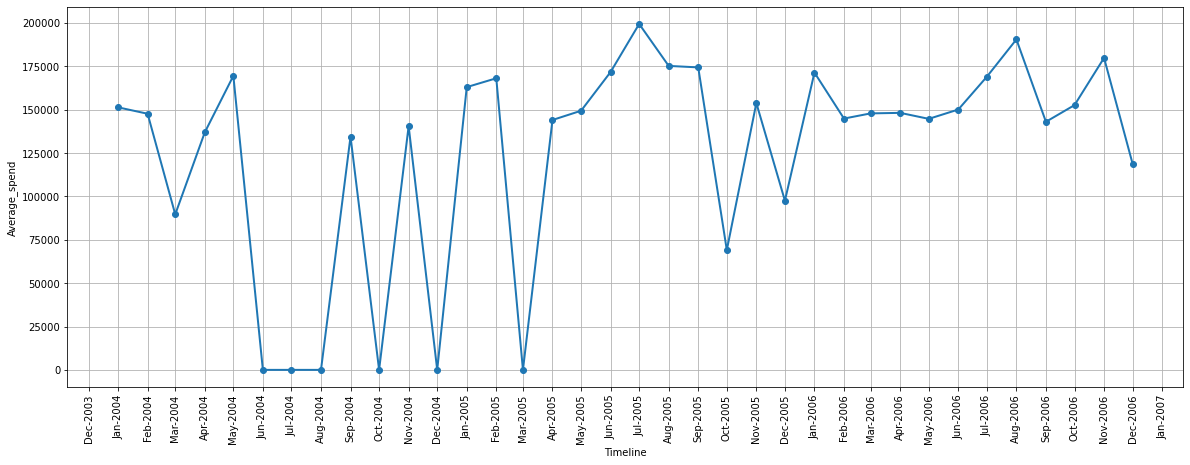

In [111]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
dateFormat = mdates.DateFormatter('%b-%Y')

fig , ax = plt.subplots(figsize=(20,7))
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFormat)
ax.plot(avg_monthly_spend_plot.monthly_dates, avg_monthly_spend_plot.Amount, linewidth=2 ,marker='o')
plt.xlabel('Timeline')
plt.ylabel('Average_spend')
plt.xticks(rotation =90)
plt.grid()
plt.show()

#### d) What is the average monthly repayment by the customers?

In [112]:
avg_monthly_repay = cust_repay.groupby(by= [cust_repay.Month.dt.year , cust_repay.Month.dt.month]).Amount.mean().round(2)
avg_monthly_repay.index.set_names(['year','month'] , level = [0,1] , inplace=True)
avg_monthly_repay.unstack().T

year,2004,2005,2006
month,,,
1,161292.57,193485.08,211479.50
2,175497.69,149261.54,199340.39
3,187433.06,NaN,170909.83
4,140886.46,103288.33,161473.11
5,154569.09,190352.35,176926.36
6,NaN,134566.87,234089.02
7,NaN,132130.21,149893.63
8,NaN,170601.60,189565.18
9,126505.72,66406.94,161374.02


##### Plotting the timeline of average monthly repay

In [113]:
avg_monthly_repay_plot = avg_monthly_repay.reset_index()
# creating datetime column from years & months column for plotting
avg_monthly_repay_plot['dates'] = pd.to_datetime( dict(year=avg_monthly_repay_plot.year,
                                                       month=avg_monthly_repay_plot.month,
                                                       day=1) )
avg_monthly_repay_plot

,year,month,Amount,dates
0,2004,1,161292.57,2004-01-01
1,2004,2,175497.69,2004-02-01
2,2004,3,187433.06,2004-03-01
3,2004,4,140886.46,2004-04-01
4,2004,5,154569.09,2004-05-01
5,2004,9,126505.72,2004-09-01
6,2004,11,151737.53,2004-11-01
7,2005,1,193485.08,2005-01-01
8,2005,2,149261.54,2005-02-01
9,2005,4,103288.33,2005-04-01


In [114]:
# generating a list of periodic dates based on monhtly freq
date_range = pd.date_range(start = avg_monthly_repay_plot.dates.min(),
                           end = avg_monthly_repay_plot.dates.max(), freq='MS').to_frame()
date_range.rename(columns = {0:'monthly_dates'}, inplace=True)

# merging the dataframes
avg_monthly_repay_plot = pd.merge(left= date_range , right= avg_monthly_repay_plot,
                                  left_on= 'monthly_dates' , right_on='dates' , how='left')

# replacing NAN values in Amount with 0
avg_monthly_repay_plot.Amount = avg_monthly_repay_plot.Amount.fillna(0)
avg_monthly_repay_plot

,monthly_dates,year,month,Amount,dates
0,2004-01-01,2004.0,1.0,161292.57,2004-01-01
1,2004-02-01,2004.0,2.0,175497.69,2004-02-01
2,2004-03-01,2004.0,3.0,187433.06,2004-03-01
3,2004-04-01,2004.0,4.0,140886.46,2004-04-01
4,2004-05-01,2004.0,5.0,154569.09,2004-05-01
5,2004-06-01,NaN,NaN,0.00,NaT
6,2004-07-01,NaN,NaN,0.00,NaT
7,2004-08-01,NaN,NaN,0.00,NaT
8,2004-09-01,2004.0,9.0,126505.72,2004-09-01
9,2004-10-01,NaN,NaN,0.00,NaT


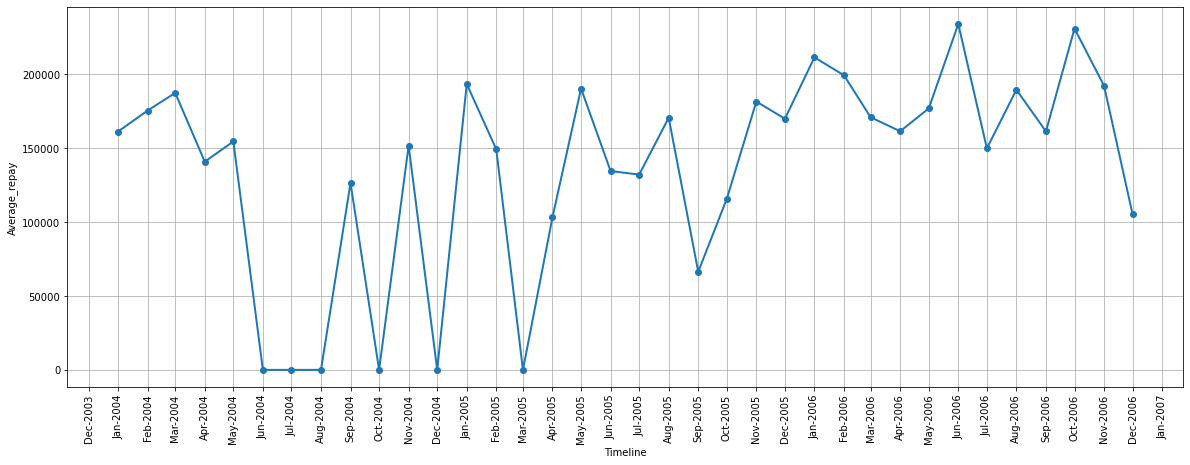

In [115]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
dateFormat = mdates.DateFormatter('%b-%Y')

fig , ax = plt.subplots(figsize=(20,7))
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFormat)
ax.plot(avg_monthly_repay_plot.monthly_dates, avg_monthly_repay_plot.Amount, linewidth=2, marker='o')
plt.xlabel('Timeline')
plt.ylabel('Average_repay')
plt.xticks(rotation =90)
plt.grid()
plt.show()

#### e) If the monthly rate of interest is 2.9%, what is the proft for the bank for each month? 

In [116]:
# calculating monthly total spend
monthly_spend = cust_spend.groupby(by = [cust_spend.Month.dt.year , cust_spend.Month.dt.month] ).Amount.sum().round(2)
monthly_spend.index.set_names(('year','month') , level = (0,1) , inplace=True)

# calculating monthly total repayment
monthly_repay = cust_repay.groupby(by= [cust_repay.Month.dt.year , cust_repay.Month.dt.month]).Amount.sum().round(2)
monthly_repay.index.set_names(('year','month') , level = (0,1) , inplace=True)

# joining the above two tables
monthly_spend_repay = pd.merge(left= monthly_spend , right= monthly_repay , on= ['year','month'],
                               how= 'outer' , suffixes= ('_spend','_repay'))

# calculating monthly profit
monthly_spend_repay['profit'] = monthly_spend_repay.Amount_repay - monthly_spend_repay.Amount_spend
monthly_spend_repay['profit_interest'] = np.where(monthly_spend_repay.profit > 0,
                                                  monthly_spend_repay.profit * 0.029, 0)
monthly_spend_repay

Amount_spend  Amount_repay      profit  profit_interest
year month                                                         
2004 1       46459874.72   45161919.58 -1297955.14          0.00000
     2        4134085.15    4738437.51   604352.36      17526.21844
     3        1254961.60    2811495.88  1556534.28      45139.49412
     4        3833059.98    4226593.85   393533.87      11412.48223
     5        2372873.66    3864227.20  1491353.54      43249.25266
     9        1882803.99    2024091.45   141287.46       4097.33634
     11       1967215.14    2276063.01   308847.87       8956.58823
2005 1        4563799.79    5224097.16   660297.37      19148.62373
     2       28239796.52   24180369.91 -4059426.61          0.00000
     4        4033312.86    3098649.83  -934663.03          0.00000
     5       20911898.21   29314261.70  8402363.49     243668.54121
     6        7211681.55    4844407.16 -2367274.39          0.00000
     7        2791638.37    1585562.51 -1206075.86          0.00000
     8        4906168.32    6312259.30  1406090.98      40776.63842
     9        2441060.67     796883.26 -1644177.41          0.00000
     10        966888.04    1389346.78   422458.74      12251.30346
     11       6459998.62    7626918.51  1166919.89      33840.67681
     12       1365317.23    2039047.67   673730.44      19538.18276
2006 1        2399167.35    2537754.01   138586.66       4019.01314
     2        6084295.19    7774275.13  1689979.94      49009.41826
     3       32082786.94   34865604.97  2782818.03      80701.72287
     4       13926331.79   14532579.83   606248.04      17581.19316
     5        8103090.65   15392592.92  7289502.27     211395.56583
     6        2100978.43    2809068.23   708089.80      20534.60420
     7        4731835.67    5546064.17   814228.50      23612.62650
     8        2666861.73    2274782.17  -392079.56          0.00000
     9        2002045.67    1936488.28   -65557.39          0.00000
     10       2136706.09    2771668.89   634962.80      18413.92120
     11       5035444.57    5190258.14   154813.57       4489.59353
     12       1662619.48    1261792.01  -400827.47          0.00000

##### Plotting the timeline of monthly profit

In [117]:
monthly_profit_plot = monthly_spend_repay.reset_index()
# creating datetime column from years & months column for plotting
monthly_profit_plot['dates'] = pd.to_datetime( dict(year=monthly_profit_plot.year,
                                                       month=monthly_profit_plot.month,
                                                       day=1) )
monthly_profit_plot

,year,month,Amount_spend,Amount_repay,profit,profit_interest,dates
0,2004,1,46459874.72,45161919.58,-1297955.14,0.00000,2004-01-01
1,2004,2,4134085.15,4738437.51,604352.36,17526.21844,2004-02-01
2,2004,3,1254961.60,2811495.88,1556534.28,45139.49412,2004-03-01
3,2004,4,3833059.98,4226593.85,393533.87,11412.48223,2004-04-01
4,2004,5,2372873.66,3864227.20,1491353.54,43249.25266,2004-05-01
5,2004,9,1882803.99,2024091.45,141287.46,4097.33634,2004-09-01
6,2004,11,1967215.14,2276063.01,308847.87,8956.58823,2004-11-01
7,2005,1,4563799.79,5224097.16,660297.37,19148.62373,2005-01-01
8,2005,2,28239796.52,24180369.91,-4059426.61,0.00000,2005-02-01
9,2005,4,4033312.86,3098649.83,-934663.03,0.00000,2005-04-01


In [118]:
# generating a list of periodic dates based on monhtly freq
date_range = pd.date_range(start = monthly_profit_plot.dates.min(),
                           end = monthly_profit_plot.dates.max(), freq='MS').to_frame()
date_range.rename(columns = {0:'monthly_dates'}, inplace=True)

# merging the dataframes
monthly_profit_plot = pd.merge(left= date_range , right= monthly_profit_plot,
                                  left_on= 'monthly_dates' , right_on='dates' , how='left')

# replacing NAN values in Profit with 0
monthly_profit_plot.profit = monthly_profit_plot.profit.fillna(0)
monthly_profit_plot

,monthly_dates,year,month,Amount_spend,Amount_repay,profit,profit_interest,dates
0,2004-01-01,2004.0,1.0,46459874.72,45161919.58,-1297955.14,0.00000,2004-01-01
1,2004-02-01,2004.0,2.0,4134085.15,4738437.51,604352.36,17526.21844,2004-02-01
2,2004-03-01,2004.0,3.0,1254961.60,2811495.88,1556534.28,45139.49412,2004-03-01
3,2004-04-01,2004.0,4.0,3833059.98,4226593.85,393533.87,11412.48223,2004-04-01
4,2004-05-01,2004.0,5.0,2372873.66,3864227.20,1491353.54,43249.25266,2004-05-01
5,2004-06-01,NaN,NaN,NaN,NaN,0.00,NaN,NaT
6,2004-07-01,NaN,NaN,NaN,NaN,0.00,NaN,NaT
7,2004-08-01,NaN,NaN,NaN,NaN,0.00,NaN,NaT
8,2004-09-01,2004.0,9.0,1882803.99,2024091.45,141287.46,4097.33634,2004-09-01
9,2004-10-01,NaN,NaN,NaN,NaN,0.00,NaN,NaT


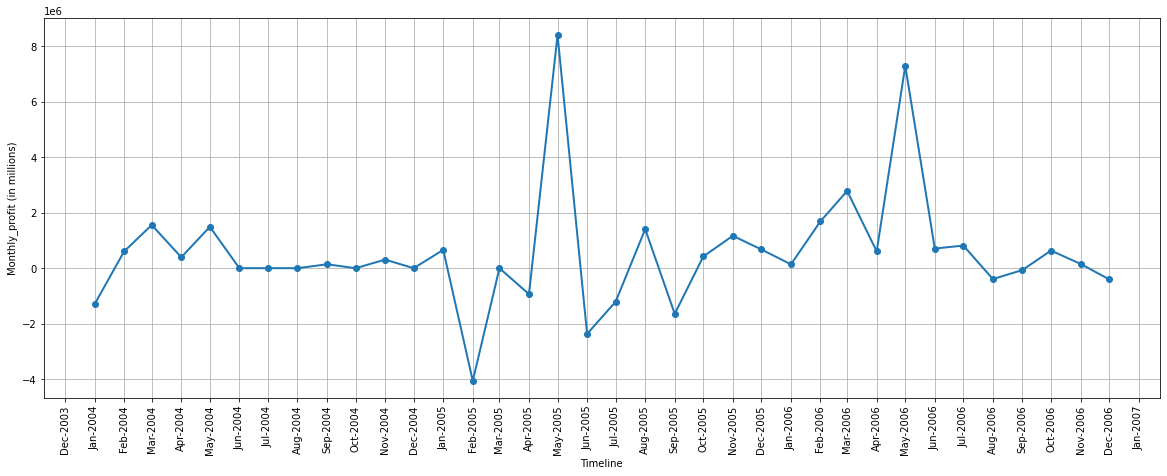

In [119]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
dateFormat = mdates.DateFormatter('%b-%Y')

fig , ax = plt.subplots(figsize=(20,7))
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFormat)
ax.plot(monthly_profit_plot.monthly_dates, monthly_profit_plot.profit, linewidth=2, marker='o')
plt.xlabel('Timeline')
plt.ylabel('Monthly_profit (in millions)')
plt.xticks(rotation =90)
plt.grid()
plt.show()

#### f) What are the top 5 Product types

In [120]:
cust_spend.pivot_table(index='Type', values='Amount', aggfunc='sum') \
    .sort_values(by='Amount' , ascending=False) \
    .head(5)

,Amount
Type,
PETRO,3.106765e+07
CAMERA,2.864800e+07
FOOD,2.440443e+07
AIR TICKET,2.378068e+07
TRAIN TICKET,1.961041e+07


#### g) Which city is having maximum spend?

In [121]:
cust_spend.groupby(by='City').Amount.sum().sort_values(ascending=False).head(1)

City
COCHIN    4.857454e+07
Name: Amount, dtype: float64

#### h) Which age group is spending more money?

In [122]:
cust_spend['age_group'] = pd.cut(cust_spend.Age ,
                                 bins=[cust_spend.Age.min() , 30 , 45 , 60 , cust_spend.Age.max()] ,
                                 include_lowest= True) 

cust_spend.groupby(by='age_group').Amount.sum().sort_values(ascending=False).head(1)

age_group
(45.0, 60.0]    6.687043e+07
Name: Amount, dtype: float64

#### i) Who are the top 10 customers in terms of repayment?

In [123]:
cust_repay.groupby('Customer').Amount.sum().sort_values(ascending=False).head(10)

Customer
A61    9.672794e+06
A60    9.168150e+06
A42    8.928473e+06
A13    8.496396e+06
A38    8.205337e+06
A43    7.976031e+06
A40    7.671796e+06
A14    7.655255e+06
A44    7.637482e+06
A26    7.472189e+06
Name: Amount, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representaton for the same.

C:\Users\User\AppData\Local\Temp/ipykernel_5080/108793626.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in y_val])


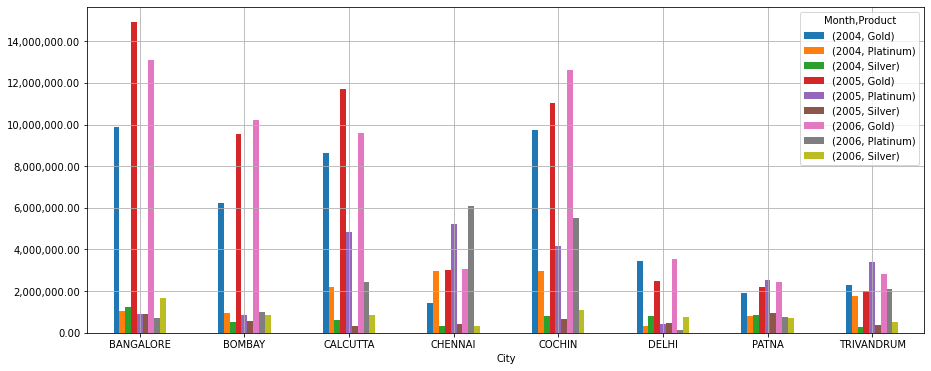

In [124]:
city_yearly_spend = cust_spend.pivot_table(index='City', columns=[cust_spend.Month.dt.year , 'Product'],
                                           values='Amount', aggfunc='sum') 
city_yearly_spend.plot(kind='bar' , figsize=(15,6) , rot=0, grid=True)
y_val=plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in y_val])
plt.show()

### 4. Create graphs for:
#### a) Monthly comparison of total spends, city wise

C:\Users\User\AppData\Local\Temp/ipykernel_5080/4171469089.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels('{:,.0f}'.format(x) % x for x in y_val)


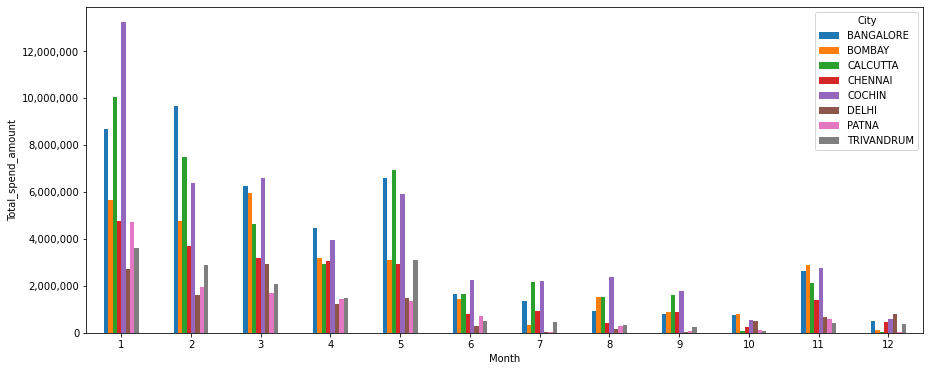

In [125]:
cust_spend.pivot_table(index=cust_spend.Month.dt.month, columns='City',
                       values='Amount', aggfunc='sum') \
    .plot(kind='bar', rot=0, figsize=(15,6) , ylabel='Total_spend_amount')
y_val = plt.gca().get_yticks()
plt.gca().set_yticklabels('{:,.0f}'.format(x) % x for x in y_val)
plt.show()

#### b) Comparison of yearly spend on air tckets

C:\Users\User\AppData\Local\Temp/ipykernel_5080/2110875118.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels('{:,.0f}'.format(x) for x in y_val)


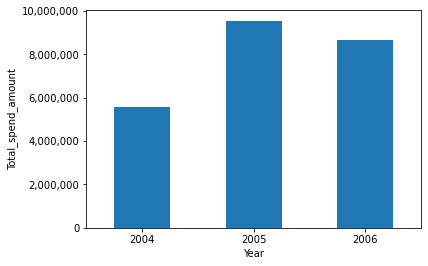

In [126]:
cust_spend.loc[cust_spend.Type == 'AIR TICKET' , :].groupby(by=cust_spend.Month.dt.year).Amount.sum() \
    .plot(kind='bar' , rot=0 , xlabel='Year' , ylabel='Total_spend_amount' )
y_val = plt.gca().get_yticks()
plt.gca().set_yticklabels('{:,.0f}'.format(x) for x in y_val)
plt.show()

####  c) Comparison of monthly spend for each product

C:\Users\User\AppData\Local\Temp/ipykernel_5080/4274548248.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels('{:,.0f}'.format(x) for x in y_val)


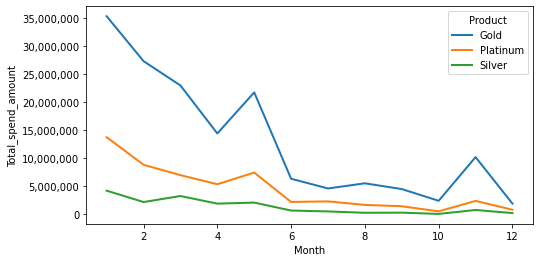

In [127]:
# Plotting by combining months of all years together
cust_spend.pivot_table(index=cust_spend.Month.dt.month , columns='Product',
                       values= 'Amount' , aggfunc='sum') \
    .plot(kind='line' , figsize=(8,4) , linewidth=2 , ylabel='Total_spend_amount')
y_val = plt.gca().get_yticks()
plt.gca().set_yticklabels('{:,.0f}'.format(x) for x in y_val)
plt.show()

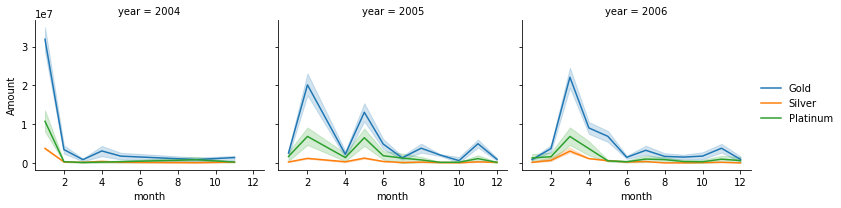

In [128]:
# Plotting for each year separately
year = cust_spend.Month.dt.year
year.name = 'year'
month = cust_spend.Month.dt.month
month.name = 'month'

# new DataFrame with year and month columns
cust_spend_plot = pd.concat(objs = [cust_spend , year, month] , axis=1)

# Plotting
g = sns.FacetGrid(cust_spend_plot, col='year', height=3, aspect=1.2)
g.map_dataframe(sns.lineplot , x='month' , y='Amount' , estimator='sum' , hue='Product')
g.add_legend()
plt.show()

#### Obseravtion based on the above graphs: 

- a) Customers with Gold product spend the most, followed by Platinum. Customers with Silver product spend the least
- b) Customers spend more in the first six months of the year
- c) There is slight increase in spending in November of every year

### 5. Write user defned PYTHON functon to find the top 10 customers for each city in terms of repayment amount by different products and by different time period i.e. monthly or yearly

In [129]:
def top_10( prod , period) :
    if period == 'YEARLY':
        # calculating the agg amount repayed for chosen Product
        top_cust = cust_repay.groupby(by=[ 'Product','City', cust_repay.Month.dt.year , 'Customer']).Amount.sum()
        top_cust = pd.DataFrame(top_cust)
        top_cust.index.set_names('Year', level=2, inplace=True)
        
        # ranking the customers based on repay amount value
        top_cust['Rank'] = top_cust.groupby(by=['Year','City'])['Amount'].rank('dense', ascending=False)
        return(top_cust.loc[(top_cust.index.get_level_values('Product').str.upper() == prod) & (top_cust.Rank <= 10)] \
               .sort_values(by=['Year','City','Rank']))
    
    elif period == 'MONTHLY':
        # calculating the agg amount repayed for chosen Product
        top_cust = cust_repay.groupby(by=['Product', 'City' , cust_repay.Month.dt.month , 'Customer']).Amount.sum()
        top_cust = pd.DataFrame(top_cust)
        
        # ranking the customers based on repay amount value
        top_cust['Rank'] = top_cust.groupby(by=['Month','City'])['Amount'].rank('dense', ascending=False)
        return(top_cust.loc[(top_cust.index.get_level_values('Product').str.upper() == prod) & (top_cust.Rank <= 10)] \
               .sort_values(by=['Month','City','Rank']))
    
    else :
        return('Invalid input')

In [130]:
prod = input('Enter Product name (Gold / Platinum / Silver) for analysis: ')
period = input('Enter time period (Yearly / Monthly) for analysis: ')

prod = prod.upper()
period = period.upper()
pd.set_option('display.max_rows' , 1000)
top_cust = top_10(prod , period)
top_cust

Enter Product name (Gold / Platinum / Silver) for analysis: gold
Enter time period (Yearly / Monthly) for analysis: yearly


Amount  Rank
Product City       Year Customer                    
Gold    BANGALORE  2004 A14       2.471342e+06   1.0
                        A13       2.196412e+06   2.0
                        A43       2.083655e+06   3.0
                        A1        2.066125e+06   4.0
                        A30       1.493289e+06   5.0
                        A63       5.656172e+05   7.0
        BOMBAY     2004 A42       3.907924e+06   1.0
                        A12       2.111529e+06   2.0
                        A17       1.718342e+06   3.0
                        A62       1.201832e+06   4.0
        CALCUTTA   2004 A60       2.542019e+06   2.0
                        A10       1.234587e+06   3.0
                        A15       8.508593e+05   4.0
                        A29       6.077592e+05   5.0
                        A31       2.838482e+05   8.0
        CHENNAI    2004 A27       2.056122e+06   2.0
                        A67       5.489147e+04   7.0
        COCHIN     2004 A61       2.540828e+06   1.0
                        A45       2.371433e+06   2.0
                        A16       8.213480e+05   4.0
                        A11       5.941103e+05   6.0
                        A32       4.130128e+05   8.0
                        A94       3.886826e+05  10.0
        DELHI      2004 A44       2.040426e+06   1.0
                        A93       4.916263e+05   5.0
        PATNA      2004 A26       2.152695e+06   1.0
                        A95       3.813704e+05   5.0
                        A66       3.590758e+05   6.0
        TRIVANDRUM 2004 A28       1.710922e+06   1.0
        BANGALORE  2005 A13       4.087767e+06   1.0
                        A43       2.849483e+06   2.0
                        A14       1.971501e+06   3.0
                        A30       1.737074e+06   4.0
                        A1        1.344026e+06   5.0
        BOMBAY     2005 A42       3.195645e+06   1.0
                        A12       2.316424e+06   2.0
                        A62       1.671739e+06   3.0
                        A17       1.591269e+06   4.0
        CALCUTTA   2005 A60       3.710653e+06   1.0
                        A29       2.911791e+06   2.0
                        A10       2.258513e+06   4.0
                        A15       2.092270e+06   5.0
                        A31       9.072667e+05   6.0
        CHENNAI    2005 A27       2.401189e+06   2.0
                        A67       4.619160e+05   5.0
        COCHIN     2005 A61       3.818018e+06   1.0
                        A45       2.323472e+06   3.0
                        A16       1.802676e+06   5.0
                        A11       1.676984e+06   6.0
                        A32       7.697227e+05   8.0
                        A65       4.557529e+05  10.0
        DELHI      2005 A44       3.062278e+06   1.0
        PATNA      2005 A26       2.556959e+06   1.0
        TRIVANDRUM 2005 A28       2.265215e+06   2.0
        BANGALORE  2006 A30       4.150574e+06   1.0
                        A14       3.212412e+06   2.0
                        A43       3.042893e+06   3.0
                        A13       2.212216e+06   4.0
                        A1        1.460421e+06   5.0
        BOMBAY     2006 A12       2.936927e+06   1.0
                        A17       2.427060e+06   2.0
                        A62       2.044286e+06   3.0
                        A42       1.824905e+06   4.0
                        A91       4.712385e+05   8.0
        CALCUTTA   2006 A29       2.965158e+06   1.0
                        A60       2.915478e+06   2.0
                        A15       2.877447e+06   3.0
                        A10       1.952030e+06   4.0
                        A31       1.409289e+06   6.0
                        A89       3.267960e+05   9.0
        CHENNAI    2006 A27       2.902149e+06   2.0
        COCHIN     2006 A61       3.313948e+06   1.0
                        A32       2.526296e+06   3.0
                        A45       2.026410e+06   5.0
            